In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv("C:\\Users\\win10\\Downloads\\house-prices-advanced-regression-techniques\\train.csv")

In [39]:
df


Id  LotArea Street  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0      1     8450   Pave            7            5       2003          2003   
1      2     9600   Pave            6            8       1976          1976   
2      3    11250   Pave            7            5       2001          2002   
3      4     9550   Pave            7            5       1915          1970   
4      5    14260   Pave            8            5       2000          2000   
..   ...      ...    ...          ...          ...        ...           ...   
194  195     7180   Pave            5            7       1972          1972   
195  196     2280   Pave            6            6       1976          1976   
196  197     9416   Pave            7            5       2007          2007   
197  198    25419   Pave            8            4       1918          1990   
198  199     5520   Pave            6            6       1912          1950   

     BedroomAbvGr  KitchenAbvGr  GarageYrBlt  GarageCars  MoSold  YrSold  \
0               3             1       2003.0           2       2    2008   
1               3             1       1976.0           2       5    2007   
2               3             1       2001.0           2       9    2008   
3               3             1       1998.0           3       2    2006   
4               4             1       2000.0           3      12    2008   
..            ...           ...          ...         ...     ...     ...   
194             3             1       1989.0           1       5    2008   
195             3             1       1976.0           2       7    2009   
196             3             1       2007.0           3       9    2007   
197             4             1       1918.0           2       3    2006   
198             5             1          NaN           0       7    2009   

     SalePrice  
0       208500  
1       181500  
2       223500  
3       140000  
4       250000  
..         ...  
194     127000  
195     148500  
196     311872  
197     235000  
198     104000  

[199 rows x 14 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            199 non-null    int64  
 1   LotArea       199 non-null    int64  
 2   Street        199 non-null    object 
 3   OverallQual   199 non-null    int64  
 4   OverallCond   199 non-null    int64  
 5   YearBuilt     199 non-null    int64  
 6   YearRemodAdd  199 non-null    int64  
 7   BedroomAbvGr  199 non-null    int64  
 8   KitchenAbvGr  199 non-null    int64  
 9   GarageYrBlt   184 non-null    float64
 10  GarageCars    199 non-null    int64  
 11  MoSold        199 non-null    int64  
 12  YrSold        199 non-null    int64  
 13  SalePrice     199 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 21.9+ KB


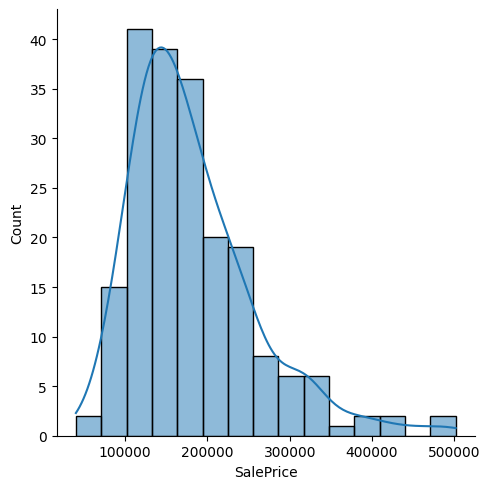

In [14]:
sns.displot(df['SalePrice'],kde=True)

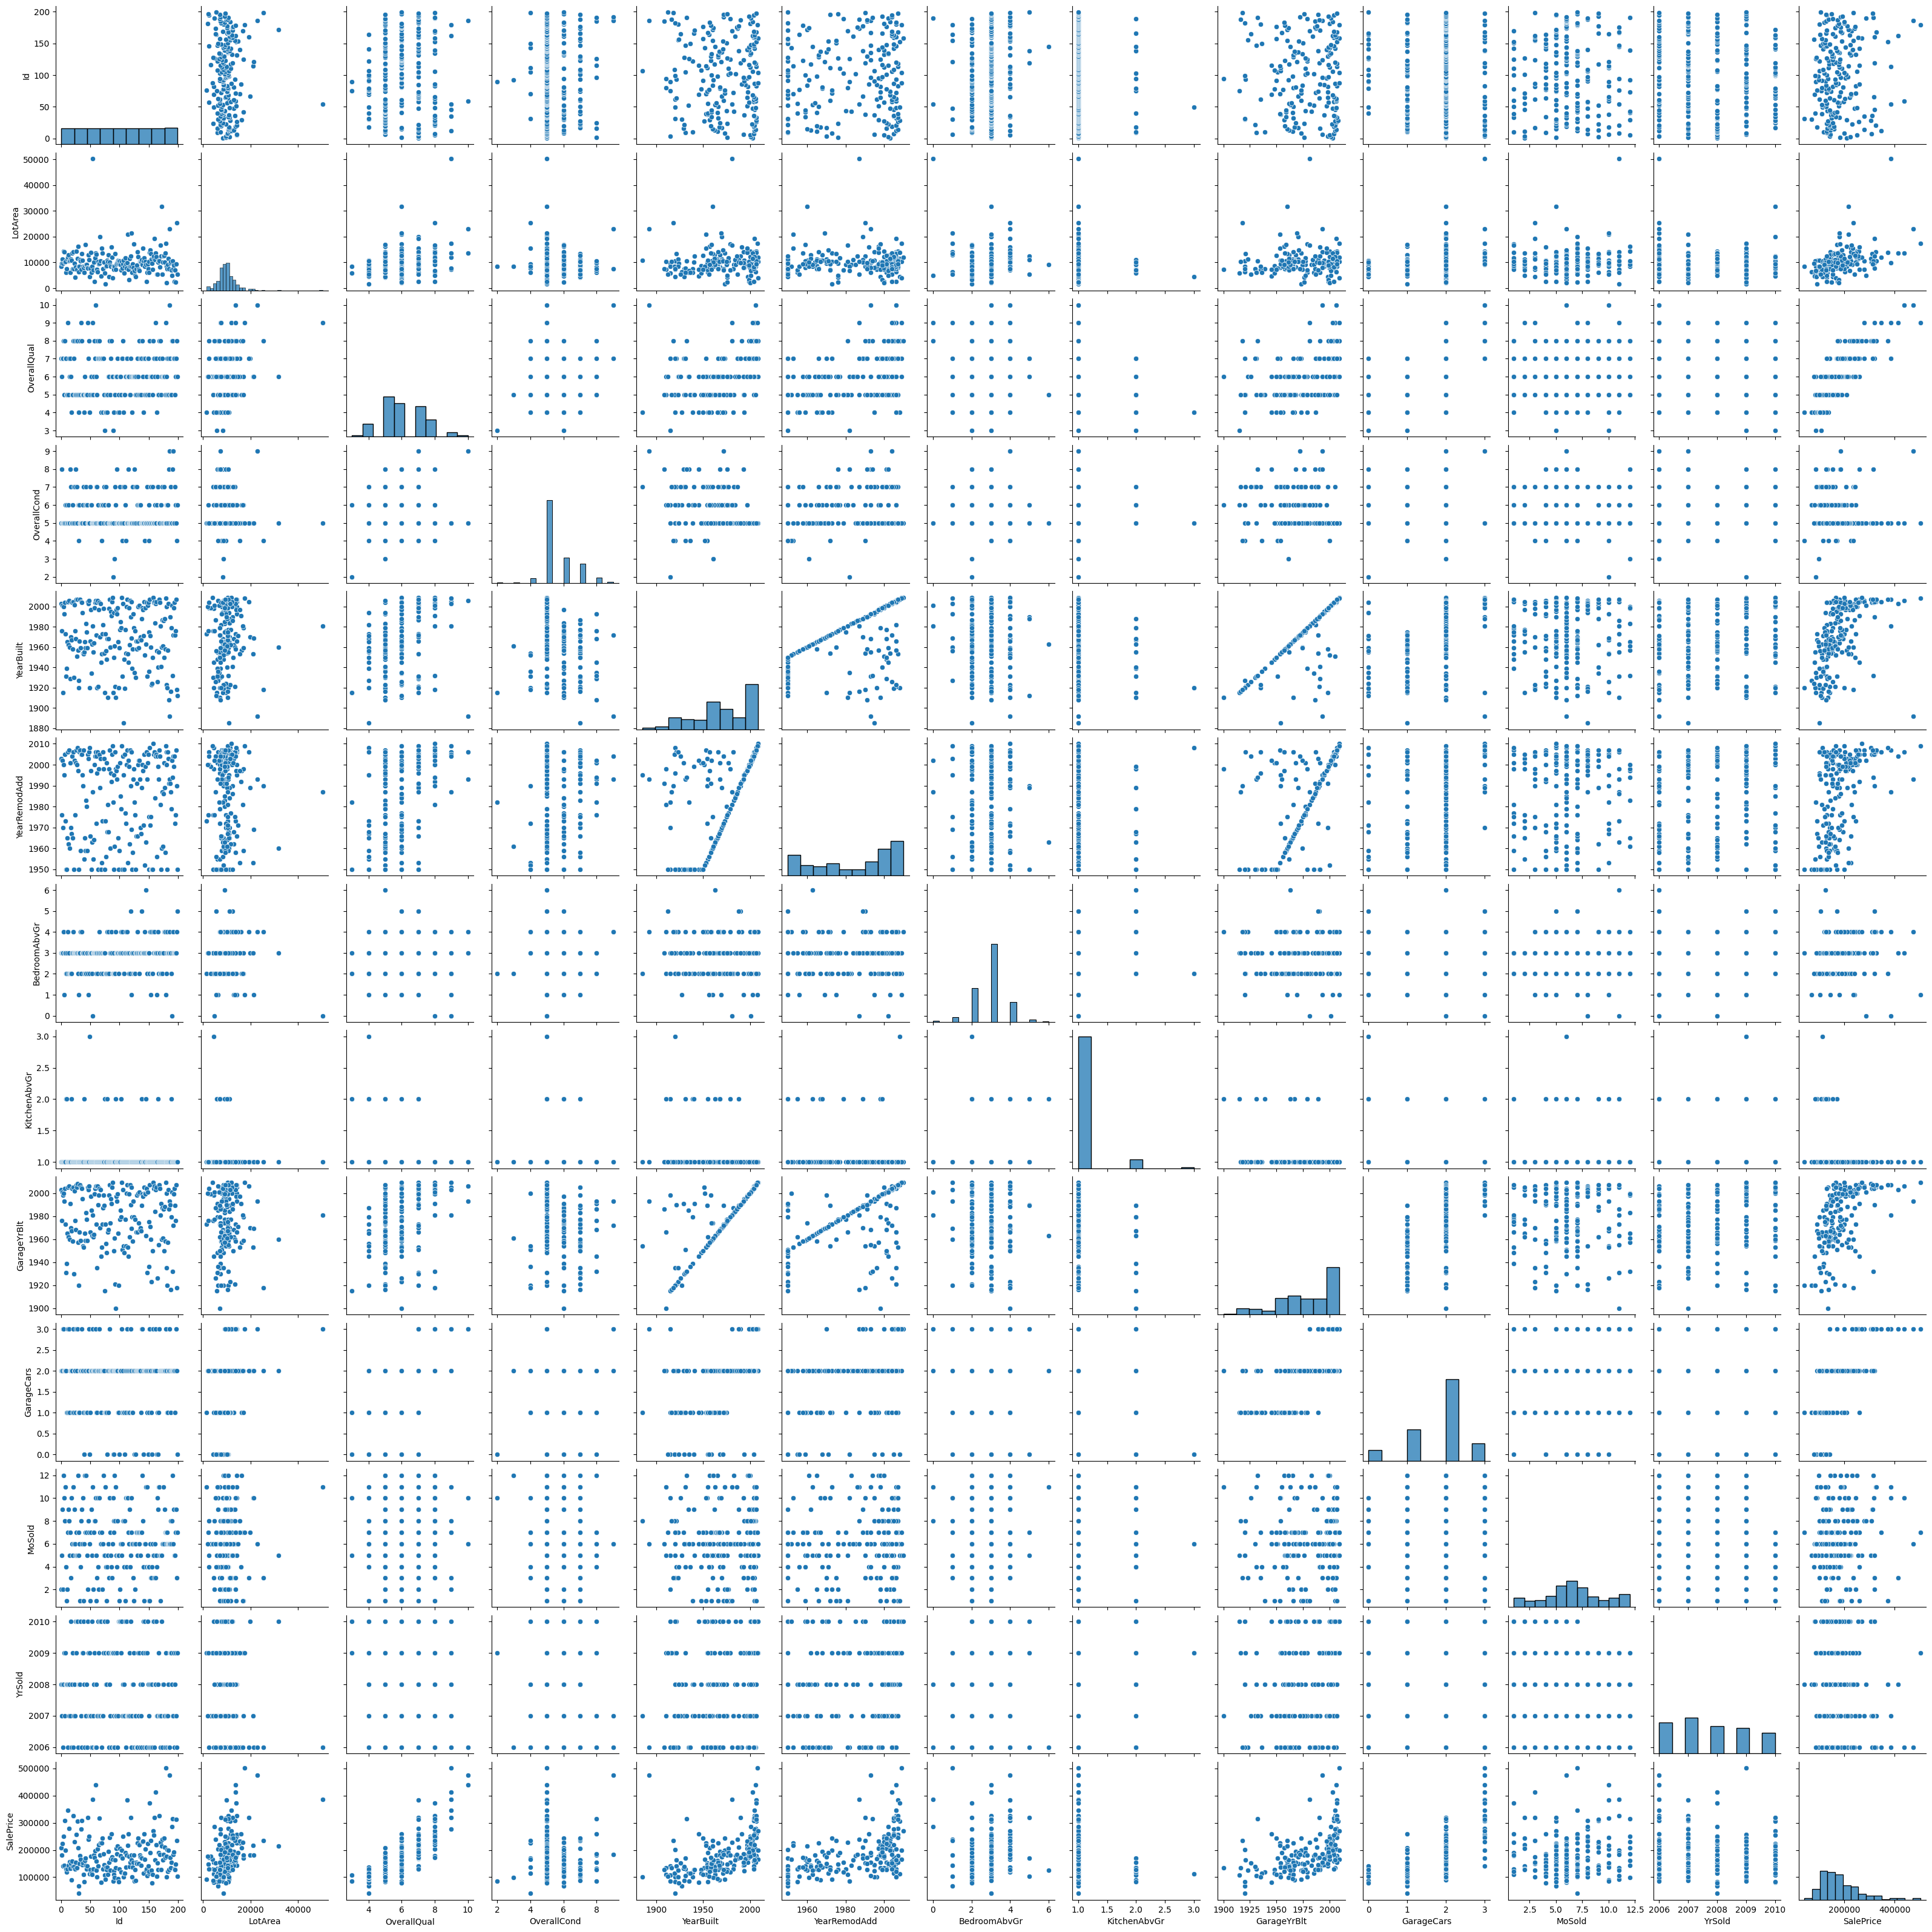

In [13]:
sns.pairplot(df)

C:\Users\win10\AppData\Local\Temp\ipykernel_8728\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

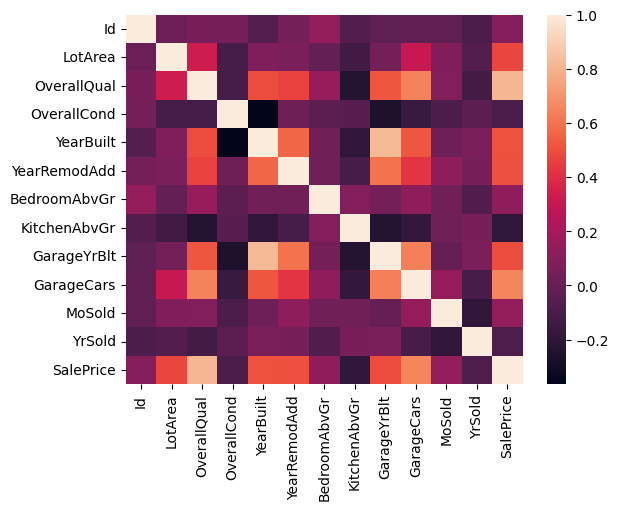

In [17]:
sns.heatmap(df.corr())

In [40]:
X = df[['Id', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BedroomAbvGr', 'KitchenAbvGr','GarageCars', 'MoSold', 'YrSold']]
Y = df['SalePrice']

In [41]:
df.columns

Index(['Id', 'LotArea', 'Street', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt',
       'GarageCars', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()


In [46]:
lm.fit(x_train,y_train)

LinearRegression()

In [47]:
lm.intercept_

-2692407.7079035784

In [48]:
lm.coef_

array([ 1.13489314e+02,  4.91367496e+00,  3.18486468e+04,  6.74481290e+03,
        3.93213437e+02,  1.80856796e+02, -5.51754739e+03,  8.32112679e+03,
        1.21345216e+04,  1.79973705e+03,  7.08207373e+02])

In [51]:
pd.DataFrame(lm.coef_,x_train.columns,columns=['coef'])

coef
Id              113.489314
LotArea           4.913675
OverallQual   31848.646842
OverallCond    6744.812901
YearBuilt       393.213437
YearRemodAdd    180.856796
BedroomAbvGr  -5517.547390
KitchenAbvGr   8321.126794
GarageCars    12134.521576
MoSold         1799.737054
YrSold          708.207373

In [56]:
predictions = lm.predict(x_test)
predictions

array([216542.37898688, 136286.42745603, 224365.11527953, 246715.82796296,
       122086.65781583, 209922.42764637, 128970.62973836, 148331.65834728,
       157786.42182182, 210485.30896671, 284695.62422825, 117526.42526851,
       146524.68825382, 214187.2001512 , 136174.52326937, 138989.00448249,
       191297.38119515, 141760.51488548, 248874.67772724, 263364.55377507,
        90993.81655572, 194803.04718378, 234465.49993286, 233057.09589281,
       178416.29837758, 120099.24867783, 114472.02332703, 319293.0261809 ,
       128844.85338512, 222449.32303321,  53472.65616488, 151695.15884797,
       246218.49810961, 125556.68140245, 229786.48983429, 167153.74683425,
       136896.95842923,  30963.106038  , 276256.56399991, 158436.49816328,
       156999.60497572, 129153.62362746, 243128.76731376, 195984.05263516,
       133062.63781027, 185648.40207852,  87197.41500817, 140385.4752438 ,
       287403.88169855, 191871.21245406, 256760.46137709, 107707.38768525,
        17881.14809318, 1

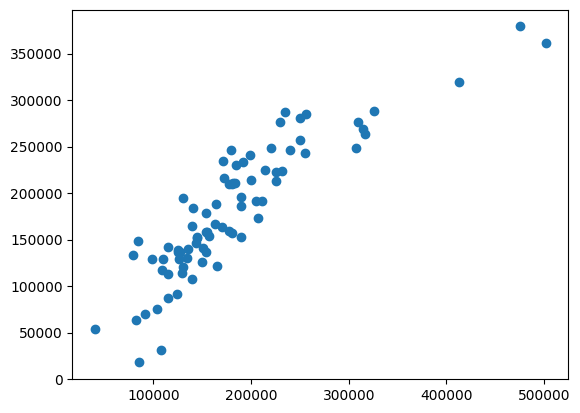

In [78]:
plt.scatter(y_test,predictions)

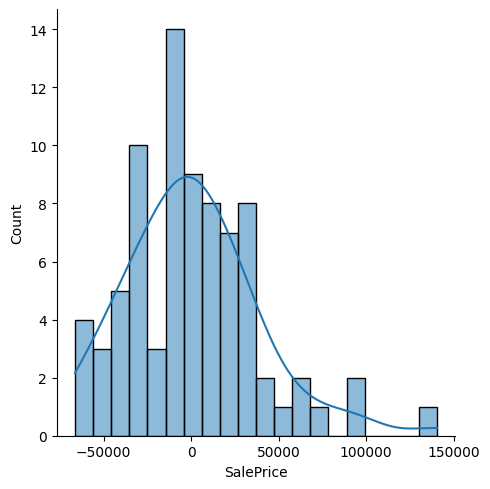

In [62]:
sns.displot(y_test-predictions,kde=True,bins=20)

In [63]:
from sklearn import metrics

In [64]:
metrics.mean_absolute_error(y_test,predictions)

28783.119838106893

In [65]:
metrics.mean_squared_error(y_test,predictions)

1447680072.9581075

In [66]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

38048.39120065535

In [6]:
dt = pd.read_csv("C:\\Users\\win10\\OneDrive\\Desktop\\bajaj.csv")

In [86]:
dt.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [87]:
X = dt[['Open', 'High', 'Low']]
Y = dt['Close']

In [89]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4)

In [90]:
lm.fit(x_train,y_train)

LinearRegression()

In [91]:
p = lm.predict(x_test)

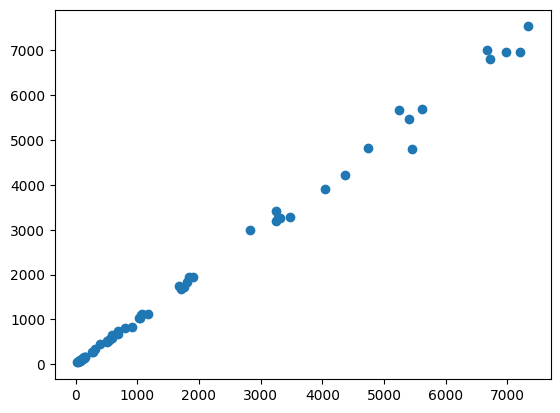

In [105]:
plt.scatter(y_test,p)

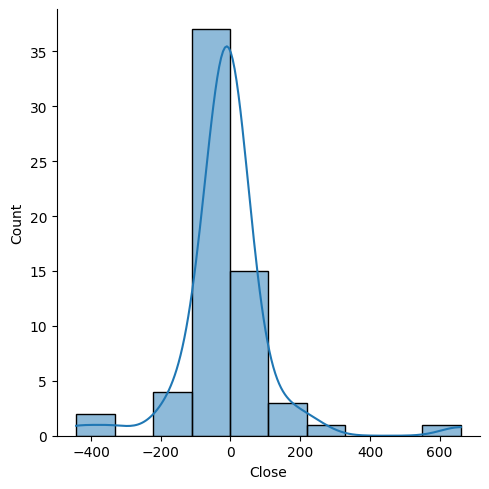

In [103]:
sns.displot(y_test-p,kde=True,bins=10)

In [116]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import plotly.graph_objects as go

In [7]:
fig = go.Figure(data=[go.Candlestick(x=dt['Date'],
                open=dt['Open'],
                high=dt['High'],
                low=dt['Low'],
                close=dt['Close'])])
fig